In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold,GridSearchCV,RandomizedSearchCV
from imblearn.under_sampling import NearMiss
from sklearn.decomposition import PCA
from sklearn import preprocessing, model_selection
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline


In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/techno/companies/company_coded_data.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57437 entries, 0 to 57436
Data columns (total 52 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   founded_at                      57437 non-null  int64  
 1   first_funding_at                57437 non-null  float64
 2   last_funding_at                 57437 non-null  float64
 3   funding_rounds                  57437 non-null  float64
 4   funding_total_usd               57437 non-null  float64
 5   first_milestone_at              57437 non-null  float64
 6   last_milestone_at               57437 non-null  float64
 7   milestones                      57437 non-null  float64
 8   relationships                   57437 non-null  float64
 9   is_Closed                       57437 non-null  int64  
 10  Active_Days                     57437 non-null  float64
 11  category_code_advertising       57437 non-null  int64  
 12  category_code_biotech           

In [4]:
x = dataset.drop('is_Closed',axis = 1)
y = dataset.is_Closed

In [5]:
y.value_counts()

0    55854
1     1583
Name: is_Closed, dtype: int64

In [6]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.06935314, -3.48124412, -2.5776107 , ..., -0.07148292,
         0.86353885, -0.27498981],
       [ 0.13844761,  0.17506959,  0.20757873, ..., -0.07148292,
        -1.15802549,  3.63649843],
       [ 0.24234799,  0.17506959,  0.20757873, ..., -0.07148292,
        -1.15802549, -0.27498981],
       ...,
       [-4.84877052,  0.17506959,  0.20757873, ..., -0.07148292,
         0.86353885, -0.27498981],
       [ 0.24234799,  0.17506959,  0.20757873, ..., -0.07148292,
         0.86353885, -0.27498981],
       [ 0.13844761, -1.65308726, -2.5776107 , ..., -0.07148292,
         0.86353885, -0.27498981]])

In [7]:
X_train,X_test,Y_train,Y_test = train_test_split(x_scaled,y,random_state = 10,test_size=0.35)

In [8]:
Y_train.value_counts()

0    36318
1     1016
Name: is_Closed, dtype: int64

In [9]:
# Importing necessary modules for metrics computation and visualization
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, precision_score, recall_score, classification_report, mean_absolute_error, f1_score
import itertools

# Definition of function to compute evaluation metrics
def metric(y_test, y_pred, x_train, y_train, model):
    # Computing test accuracy
    test_acc = accuracy_score(y_test, y_pred)

    # Computing train accuracy
    train_acc = model.score(x_train, y_train)

    # Computing precision score
    precision = precision_score(y_test, y_pred, average='macro')

    # Computing recall score
    recall = recall_score(y_test, y_pred, average='macro')

    # Computing mean squared error
    mse = mean_squared_error(y_test, y_pred)

    # Computing mean absolute error
    mae = mean_absolute_error(y_test, y_pred)

    # Computing F1_score
    F1_score = f1_score(y_test, y_pred, average='macro')

    # Printing computed metrics
    print('Test accuracy score:', test_acc, "%")
    print('Train accuracy score:', train_acc, "%")
    print('Precision score:', precision, "%")
    print('Recall score:', recall, "%")
    print('Mean Squared Error:', mse, "%")
    print('Mean Absolute Error:', mae, "%")
    print('F1-score:', F1_score, "%")

    # Printing classification report
    print("Classification report:")
    print(classification_report(y_test, y_pred))

    # Printing confusion matrix
    print("Confusion Matrix")
    conf_mat = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    fig1 = plt.figure(figsize=(7, 6))
    plot_confusion_matrix(conf_mat, classes=y.value_counts().index.tolist(), title='Confusion matrix')

    # Returning computed metrics
    return test_acc, train_acc, precision, recall, mse, mae, F1_score

# Definition of function to plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Reds):
    # Plotting confusion matrix
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.xticks(range(cm.shape[0]))
    plt.yticks(range(cm.shape[1]))

    # Normalizing confusion matrix if required
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
    else:
        cm = cm

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


**KNN**

In [10]:
knn = KNeighborsClassifier()

In [11]:
train_acc_score =[]
test_acc_score = []
for i in range(1,30):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, Y_train)

    y_pred_train = knn.predict(X_train)
    train_accuracy = accuracy_score(Y_train, y_pred_train)

    y_pred_test = knn.predict(X_test)
    test_accuracy = accuracy_score(Y_test, y_pred_test)

    train_acc_score.append(train_accuracy)
    test_acc_score.append(test_accuracy)

In [12]:
print(train_acc_score)
print(test_acc_score)

[1.0, 0.9898483955643649, 0.990973375475438, 0.9862591739433224, 0.9874377243263514, 0.9843038517169336, 0.985268120212139, 0.983018160389993, 0.983768146997375, 0.9818396100069642, 0.9823753147265227, 0.980794985803825, 0.9814914019392511, 0.9801789253763326, 0.9806342743879574, 0.9794825092409064, 0.9799110730165532, 0.9791610864091712, 0.9794825092409064, 0.9785450259816789, 0.9788396635774361, 0.97814324744201, 0.9785718112176568, 0.977714683666363, 0.9779825360261424, 0.9772325494187604, 0.9775004017785397, 0.9770986232388708, 0.9772593346547384]
[0.9865691687807789, 0.9839824901755957, 0.9852758294781874, 0.9829876137889867, 0.9834353081629608, 0.9811968362930906, 0.9819927374023778, 0.9804009351838034, 0.9811968362930906, 0.9797542655325076, 0.9805999104611252, 0.9791573397005422, 0.9795552902551858, 0.978361438591255, 0.9787593891458987, 0.9781624633139332, 0.9786599015072377, 0.9779137442172811, 0.9781624633139332, 0.9775157936626374, 0.9775655374819678, 0.9770680992886633, 0.

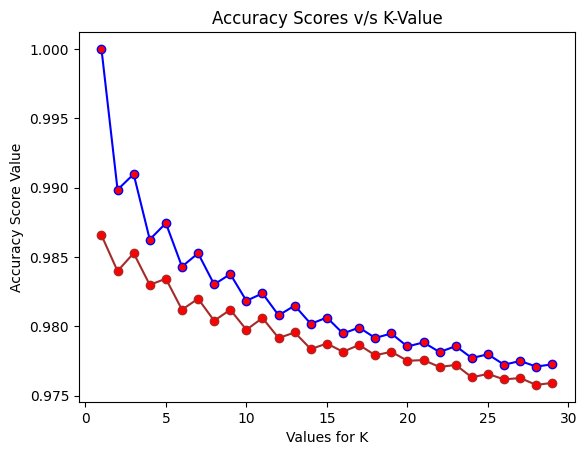

In [13]:
plt.figure()
plt.plot(range(1,30),train_acc_score,color='blue',marker='o',markerfacecolor='red')
plt.plot(range(1,30),test_acc_score,color='brown',marker='o',markerfacecolor='red')

plt.xlabel('Values for K')
plt.ylabel('Accuracy Score Value')
plt.title('Accuracy Scores v/s K-Value')
plt.show()

In [14]:
error_score = []
for i in range(1,30):
    knn = KNeighborsClassifier(i)
    score = cross_val_score(knn,X_train,Y_train,cv=2)
    error_score.append(1-(score.mean()))

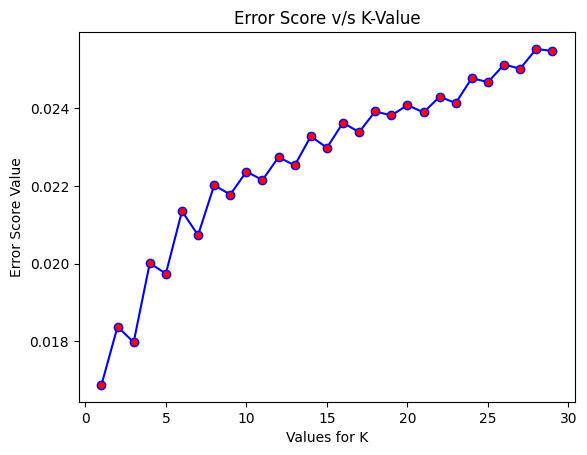

In [15]:
plt.figure()
plt.plot(range(1,30),error_score,color='blue',marker='o',markerfacecolor='red')
plt.xlabel('Values for K')
plt.ylabel('Error Score Value')
plt.title('Error Score v/s K-Value')
plt.show()

In [10]:
knn_1 = KNeighborsClassifier(n_neighbors=8)
knn_1.fit(X_train,Y_train)
predict_1 = knn_1.predict(X_test)

print(accuracy_score(predict_1,Y_test))
print(confusion_matrix(predict_1,Y_test))
print(classification_report(Y_test,predict_1))

0.9804009351838034
[[19532   390]
 [    4   177]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     19536
           1       0.98      0.31      0.47       567

    accuracy                           0.98     20103
   macro avg       0.98      0.66      0.73     20103
weighted avg       0.98      0.98      0.98     20103



Test accuracy score: 0.9804009351838034 %
Train accuracy score: 0.983018160389993 %
Precision score: 0.9791621023649693 %
Recall score: 0.655982280982281 %
Mean Squared Error: 0.01959906481619659 %
Mean Absolute Error: 0.01959906481619659 %
F1-score: 0.7316383656296833 %
Classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     19536
           1       0.98      0.31      0.47       567

    accuracy                           0.98     20103
   macro avg       0.98      0.66      0.73     20103
weighted avg       0.98      0.98      0.98     20103

Confusion Matrix


(0.9804009351838034,
 0.983018160389993,
 0.9791621023649693,
 0.655982280982281,
 0.01959906481619659,
 0.01959906481619659,
 0.7316383656296833)

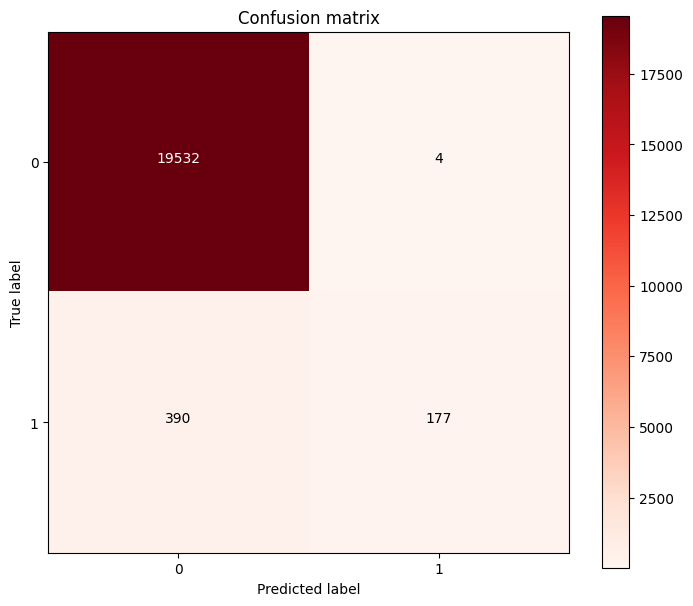

In [12]:
metric(Y_test, predict_1, X_train, Y_train, knn_1)

In [17]:
grid_params = { 'n_neighbors' : [7,8,9,11,13,15,17],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [18]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=2, n_jobs = -1)
g_res = gs.fit(X_train, Y_train)
g_res.best_score_

Fitting 2 folds for each of 42 candidates, totalling 84 fits


0.9806878448599132

In [19]:
g_res.best_params_

{'metric': 'minkowski', 'n_neighbors': 7, 'weights': 'distance'}

In [14]:
knn = KNeighborsClassifier(n_neighbors = 13, weights = 'uniform',metric = 'manhattan')

In [15]:
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)

Test accuracy score: 0.9776152813012983 %
Train accuracy score: 0.9797771468366636 %
Precision score: 0.9887421194836385 %
Recall score: 0.6031746031746031 %
Mean Squared Error: 0.022384718698701685 %
Mean Absolute Error: 0.022384718698701685 %
F1-score: 0.6653595998497839 %
Classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     19536
           1       1.00      0.21      0.34       567

    accuracy                           0.98     20103
   macro avg       0.99      0.60      0.67     20103
weighted avg       0.98      0.98      0.97     20103

Confusion Matrix


(0.9776152813012983,
 0.9797771468366636,
 0.9887421194836385,
 0.6031746031746031,
 0.022384718698701685,
 0.022384718698701685,
 0.6653595998497839)

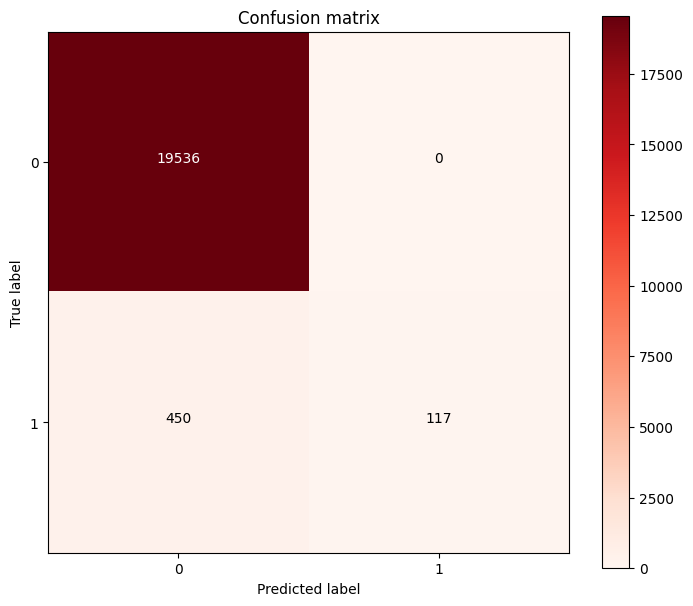

In [18]:
metric(Y_test, y_pred, X_train, Y_train, knn)

In [22]:
pipeline_KNeighborsClassifier= Pipeline([('scaler2', StandardScaler()),
                                        ('pca2',PCA(n_components=2)),
                                        ('kNN_classifier',KNeighborsClassifier(n_neighbors = 7))])

In [25]:
pipeline_KNeighborsClassifier.fit(X_train,Y_train)
pred = pipeline_KNeighborsClassifier.predict(X_test)
accuracy_score(Y_test,pred)

0.9708998656916878

**Random forest classifier**

In [20]:
from sklearn.ensemble import RandomForestClassifier
forest_reg = RandomForestClassifier()
forest_reg.fit(X_train, Y_train)

RandomForestClassifier()

Test accuracy score: 0.9990548674327215 %
Train accuracy score: 1.0 %
Precision score: 0.9995141907440552 %
Recall score: 0.9832451499118166 %
Mean Squared Error: 0.0009451325672785156 %
Mean Absolute Error: 0.0009451325672785156 %
F1-score: 0.9912367979371577 %
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19536
           1       1.00      0.97      0.98       567

    accuracy                           1.00     20103
   macro avg       1.00      0.98      0.99     20103
weighted avg       1.00      1.00      1.00     20103

Confusion Matrix


(0.9990548674327215,
 1.0,
 0.9995141907440552,
 0.9832451499118166,
 0.0009451325672785156,
 0.0009451325672785156,
 0.9912367979371577)

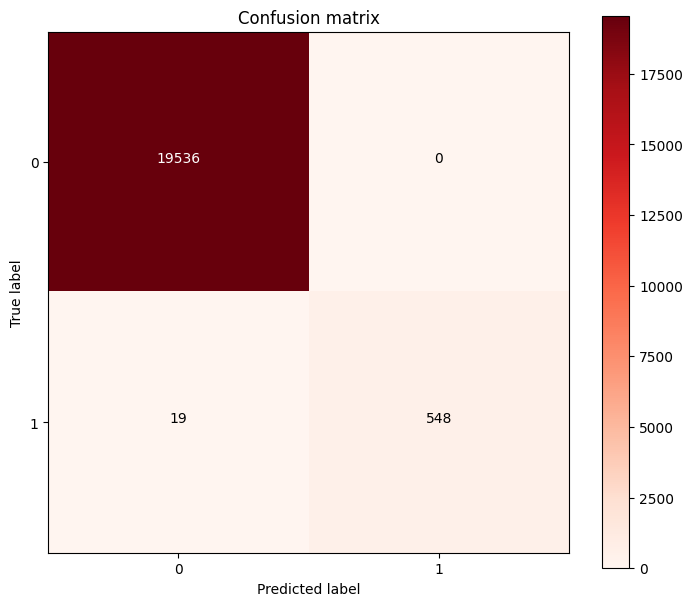

In [21]:
forest_reg_predict = forest_reg.predict(X_test)
metric(Y_test, forest_reg_predict, X_train, Y_train, forest_reg)

In [32]:
rfc = RandomForestClassifier()

In [33]:
for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, random_state = i, test_size = 0.25)
    rfc.fit(x_train,y_train)
    pred_train = rfc.predict(x_train)
    pred_test = rfc.predict(x_test)
    if  round(accuracy_score(y_test,pred_test)*100,1) >= 93:
        print('At Random state:',i)
        print('Training score :',round(accuracy_score(y_train,pred_train)*100,1))
        print('Testing score:',round(accuracy_score(y_test,pred_test)*100,1))


At Random state: 0
Training score : 100.0
Testing score: 99.9
At Random state: 1
Training score : 100.0
Testing score: 99.9
At Random state: 2
Training score : 100.0
Testing score: 99.9
At Random state: 3
Training score : 100.0
Testing score: 99.9
At Random state: 4
Training score : 100.0
Testing score: 99.9
At Random state: 5
Training score : 100.0
Testing score: 99.9
At Random state: 6
Training score : 100.0
Testing score: 99.8
At Random state: 7
Training score : 100.0
Testing score: 99.9
At Random state: 8
Training score : 100.0
Testing score: 99.9
At Random state: 9
Training score : 100.0
Testing score: 99.9


**RandomizedSearchCV**

In [22]:
n_estimators = [int(X) for X in np.linspace(start=100,stop=2000,num=10)]
max_features = ['auto','sqrt','log2']
max_depth = [int(X) for X in np.linspace(5,100,15)]
min_samples_split = [2,5,10,20,50]
min_samples_leaf = [2,6,10,20,40]

In [23]:
rf_base = RandomForestClassifier()
random_grid = {'n_estimators':n_estimators,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'max_features':max_features}

In [25]:
rf_tuned = RandomizedSearchCV(rf_base,param_distributions=random_grid,scoring='neg_mean_squared_error',cv=2,verbose=2,random_state=10)
rf_tuned.fit(X_train, Y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=20, n_estimators=2000; total time=  34.8s
[CV] END max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=20, n_estimators=2000; total time=  26.7s
[CV] END max_depth=66, max_features=log2, min_samples_leaf=2, min_samples_split=50, n_estimators=733; total time=  11.4s
[CV] END max_depth=66, max_features=log2, min_samples_leaf=2, min_samples_split=50, n_estimators=733; total time=   9.3s
[CV] END max_depth=11, max_features=log2, min_samples_leaf=6, min_samples_split=50, n_estimators=944; total time=  12.0s
[CV] END max_depth=11, max_features=log2, min_samples_leaf=6, min_samples_split=50, n_estimators=944; total time=  15.2s
[CV] END max_depth=66, max_features=log2, min_samples_leaf=2, min_samples_split=50, n_estimators=311; total time=   9.2s
[CV] END max_depth=66, max_features=log2, min_samples_leaf=2, min_samples_split=50, n_esti

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.8s
[CV] END max_depth=93, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=311; total time=   6.1s
[CV] END max_depth=93, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=311; total time=   4.4s
[CV] END max_depth=93, max_features=sqrt, min_samples_leaf=40, min_samples_split=20, n_estimators=944; total time=  14.4s
[CV] END max_depth=93, max_features=sqrt, min_samples_leaf=40, min_samples_split=20, n_estimators=944; total time=  13.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [5, 11, 18, 25, 32, 38, 45,
                                                      52, 59, 66, 72, 79, 86,
                                                      93, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 6, 10, 20, 40],
                                        'min_samples_split': [2, 5, 10, 20, 50],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=10, scoring='neg_mean_squared_error',
                   verbose=2)

In [26]:
rf_tuned.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 18}

In [28]:
rf_tun = RandomForestClassifier(n_estimators = 100, min_samples_split = 10, min_samples_leaf = 2, max_features= 'auto',max_depth = 18)
rf_tun.fit(X_train, Y_train)
Y_pred = rf_tun.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Test accuracy score: 0.999005123613391 %
Train accuracy score: 0.998848234852949 %
Precision score: 0.999488647985273 %
Recall score: 0.982363315696649 %
Mean Squared Error: 0.0009948763866089638 %
Mean Absolute Error: 0.0009948763866089638 %
F1-score: 0.9907675325030803 %
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19536
           1       1.00      0.96      0.98       567

    accuracy                           1.00     20103
   macro avg       1.00      0.98      0.99     20103
weighted avg       1.00      1.00      1.00     20103

Confusion Matrix


(0.999005123613391,
 0.998848234852949,
 0.999488647985273,
 0.982363315696649,
 0.0009948763866089638,
 0.0009948763866089638,
 0.9907675325030803)

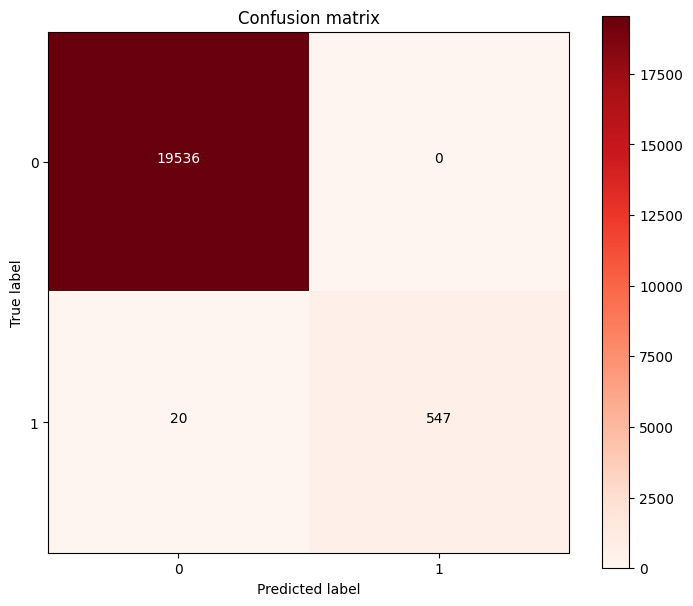

In [30]:
metric(Y_test, Y_pred, X_train, Y_train, rf_tun)

**- GridSearchCV.**

In [31]:
n_estimators_list = [130,160,190]
criterion_list = ['gini']
max_depth_list = [35,55]
min_samples_split_list = [0.001, 0.005]
min_samples_leaf_list = [0.001, 0.005]
max_features_list = ['log2']

In [32]:
params_grid = {'n_estimators': n_estimators_list,
               'criterion': criterion_list,
               'max_depth': max_depth_list,
               'min_samples_split': min_samples_split_list,
               'min_samples_leaf': min_samples_leaf_list,
               'max_features': max_features_list}

In [34]:
model_rfg = GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced'),param_grid=params_grid,cv=3,verbose=4)
model_rfg.fit(X_train,Y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=130;, score=0.996 total time=   3.8s
[CV 2/3] END criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=130;, score=0.999 total time=   2.8s
[CV 3/3] END criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=130;, score=0.998 total time=   1.8s
[CV 1/3] END criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=160;, score=0.995 total time=   2.2s
[CV 2/3] END criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=160;, score=0.998 total time=   2.1s
[CV 3/3] END criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=160;, scor

GridSearchCV(cv=3, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini'], 'max_depth': [35, 55],
                         'max_features': ['log2'],
                         'min_samples_leaf': [0.001, 0.005],
                         'min_samples_split': [0.001, 0.005],
                         'n_estimators': [130, 160, 190]},
             verbose=4)

In [35]:
model_rfg.best_params_

{'criterion': 'gini',
 'max_depth': 55,
 'max_features': 'log2',
 'min_samples_leaf': 0.001,
 'min_samples_split': 0.001,
 'n_estimators': 130}

In [36]:
model_rf_fin = RandomForestClassifier(class_weight='balanced',
                                      criterion='gini',
                                      max_depth=55,
                                      max_features='log2',
                                      min_samples_leaf=0.001,
                                      min_samples_split=0.001,
                                      n_estimators=130)

In [38]:
model_rf_fin.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', max_depth=55,
                       max_features='log2', min_samples_leaf=0.001,
                       min_samples_split=0.001, n_estimators=130)

In [39]:
pipeline_randomforest =  Pipeline([('scaler1', StandardScaler()),
                               ('pca1',PCA(n_components=2)),
                               ('rf_classifier',RandomForestClassifier())])

In [41]:
pipeline_randomforest.fit(X_train,Y_train)
pred = pipeline_randomforest.predict(X_test)
accuracy_score(Y_test,pred)

0.9700542207630702